In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
diabetes_dataframe = pd.read_csv("./Diabetes dataset/Clean_diabetes_dataset.csv")
diabetes_dataframe.drop(columns=["Unnamed: 0", "SkinThickness"], inplace=True)
diabetes_dataframe.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,5,116,74,0,25.6,0.201,30,0


In [21]:
# checking co-relationn 
corr_matrix = diabetes_dataframe.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.142093,0.210666,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.142093,1.000000,0.238754,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.210666,0.238754,1.000000,-0.041513,0.303301,0.024290,0.354036,0.183298
Insulin,-0.114510,0.248225,-0.041513,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.036958,0.192504,0.303301,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,0.009289,0.066530,0.024290,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.567438,0.286682,0.354036,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,0.227987,0.492740,0.183298,0.097746,0.269371,0.179072,0.263344,1.000000


In [22]:
corr_matrix['Outcome']*100

Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

In [23]:
diabetes_dataframe.head(5)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,5,116,74,0,25.6,0.201,30,0


In [24]:
X = diabetes_dataframe.drop(['Outcome'], axis='columns')
y = diabetes_dataframe.Outcome
X.shape,y.shape

((639, 7), (639,))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
len(X_train),len(X_test)

(511, 128)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
print(X_train_sc)
print("----------------------")
print(X_test_sc)

[[-8.79417944e-01  1.00420719e+00 -3.93266230e-01 ... -4.28419343e-01
  -3.23522803e-01  8.04213916e-01]
 [-1.18595449e+00  6.94707870e-01 -6.56646365e-01 ...  1.61600306e+00
   3.54370181e-03 -8.03165397e-01]
 [ 3.46728221e-01  7.57092274e-02  1.18701458e+00 ...  4.01646894e-01
  -5.58851142e-01  5.24259398e-04]
 ...
 [-5.72881403e-01 -6.12067043e-01  1.18701458e+00 ...  2.06177937e+00
  -1.20899554e+00 -8.92464248e-01]
 [-2.66344862e-01 -1.30623654e-01  1.33494041e-01 ... -8.89567252e-01
  -1.28876785e+00 -8.03165397e-01]
 [-8.79417944e-01 -9.62348401e-02  1.36260134e+00 ...  3.70903700e-01
  -1.08137544e-01  6.25616214e-01]]
----------------------
[[-2.66344862e-01 -1.26545450e+00 -1.27120001e+00 -6.14592851e-01
   3.40160506e-01 -3.75374810e-01 -7.13866546e-01]
 [-2.66344862e-01 -1.05912162e+00  1.33494041e-01  2.14053447e-01
  -2.59331776e-01  4.82177612e-01  4.47018513e-01]
 [ 1.26633784e+00 -4.40122975e-01  6.60254312e-01 -8.37214245e-01
  -1.15088440e+00  1.69870547e+00  8.9823

In [27]:
X_train_sc = pd.DataFrame(X_train_sc, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_test_sc = pd.DataFrame(X_test_sc, columns=["Pregnancies","Glucose","BloodPressure","Insulin","BMI","DiabetesPedigreeFunction","Age"])
X_train_sc.describe().round()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
count,511.0,511.0,511.0,511.0,511.0,511.0,511.0
mean,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-3.0,-3.0,-1.0,-2.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
Score = {}
n_estimators = [10,25,50,75,100,125,150]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            model.fit(X_train_sc,y_train)
            acc = model.score(X_test_sc,y_test)*100
            Score[n,c,mf] = acc
            
max(Score.values()) # 83.59375
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())

((50, 'log_loss', 'log2'), 85.15625)

In [33]:

model = RandomForestClassifier(n_estimators=50,criterion='log_loss',max_features='log2')
model.fit(X_train_sc,y_train)
model.score(X_test_sc,y_test)*100 # after cleaning -> 74.02597402597402 before cleaning ->79.6875 after tuning -> 83.59375

85.15625

In [30]:
y_pre = model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test, y_pre)
cn

array([[ 0, 92],
       [ 0, 36]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth Values')

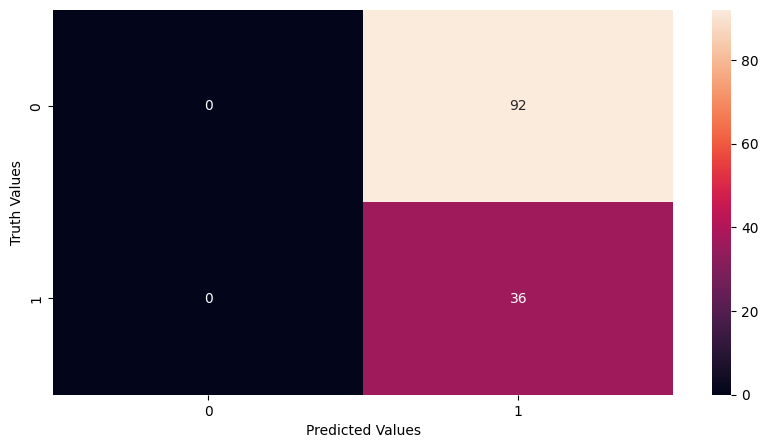

In [32]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(cn, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Truth Values')